В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

* на шаге E мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;
* на шаге M мы пересчитываем центроиды кластеров.

На шаге E данного алгоритма мы будем определять вероятность того, что объект принадлежит к кластеру, а на шаге M будем пересчитывать параметры функции Гаусса, чтобы подобрать наиболее подходящие кластеры для наших данных.(модель гауссовой смеси (Gaussian Mixture Model, GMM),)

# ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ EM-КЛАСТЕРИЗАЦИЯ?

* GMM-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.
* GMM можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.
* Используя GMM, можно анализировать временные ряды цен в периоды действия акций.

```python
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
```

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

* n_components — количество кластеров.
* random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

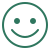

* Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.

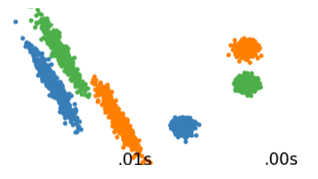

* Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

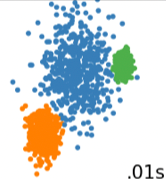

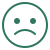

* Нужно задавать количество кластеров.
* Чувствителен к тому, с какой точки начинается алгоритм.
* Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

In [1]:
import pandas as pd

df = pd.read_csv('data/housing.csv')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


5.4 Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

<AxesSubplot: xlabel='year', ylabel='price'>

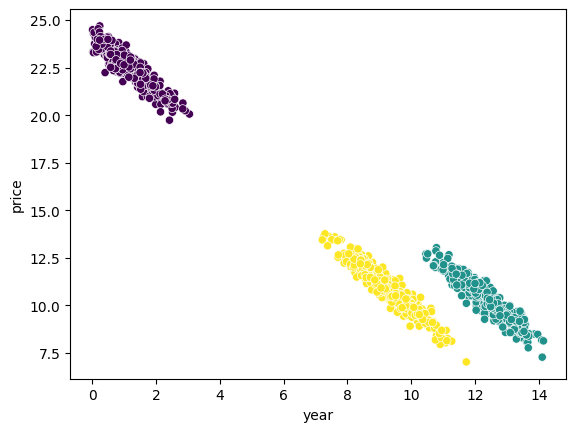

In [15]:
from sklearn.mixture import GaussianMixture
import seaborn as sns
gaussian_clustering = GaussianMixture(n_components=3)
predictions = gaussian_clustering.fit_predict(X=df[['year', 'price']])
#хз какграфик вывести
sns.scatterplot(x=df.year, y=df.price, c=predictions)

5.5 Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

<AxesSubplot: xlabel='year', ylabel='price'>

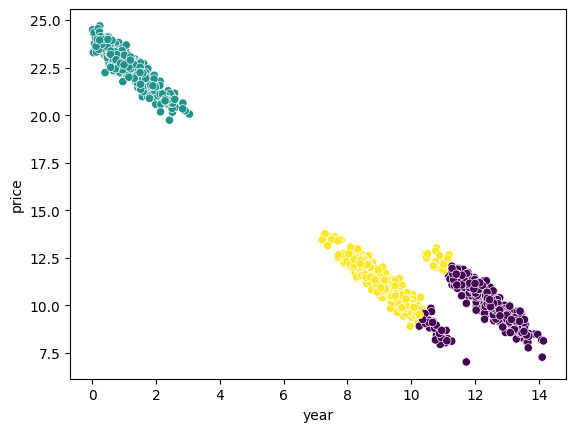

In [18]:
from sklearn.cluster import KMeans
import seaborn as sns
#gaussian_clustering = GaussianMixture(n_components=3)
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
predictions = k_means.fit_predict(X=df[['year', 'price']])
#хз какграфик вывести
sns.scatterplot(x=df.year, y=df.price, c=predictions)